In [170]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pybaseball
pd.set_option('display.max_columns', None)


In [171]:
df = pd.read_csv('full_2021_season.csv')
ff_spin = pd.read_csv('ff_spin_direction.csv')
fc_spin = pd.read_csv('fc_spin_direction.csv')
df.head()

,Unnamed: 0,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,SP,hit_team
0,0,2850,FF,2021-10-03,92.3,1.40,6.80,"Smith, Will",596019.0,519293,field_out,hit_into_play,NaN,NaN,NaN,NaN,1.0,"Francisco Lindor grounds out, third baseman Eh...",R,R,L,ATL,NYM,X,5.0,ground_ball,1.0,2.0,2021.0,0.69,1.38,-0.69,2.83,NaN,NaN,NaN,2.0,9.0,Top,77.54,155.31,NaN,NaN,518595.0,NaN,NaN,-6.833043,-134.166485,-7.361843,9.708393,26.562803,-14.083224,3.32,1.51,13.0,95.2,-13.0,92.8,2330.0,6.5,632254.0,519293.0,518595.0,663586.0,645277.0,501303.0,606115.0,592696.0,628338.0,594807.0,54.03,0.177,0.171,0.0,1.0,0.0,0.0,2.0,61.0,4.0,4-Seam Fastball,5.0,0.0,0.0,5.0,0.0,5.0,0.0,5.0,Infield shift,Strategic,148.0,0.000,-0.072,0,ATL
1,1,3020,SL,2021-10-03,80.6,1.60,6.64,"Smith, Will",596019.0,519293,NaN,foul,NaN,NaN,NaN,NaN,4.0,"Francisco Lindor grounds out, third baseman Eh...",R,R,L,ATL,NYM,S,NaN,NaN,1.0,1.0,2021.0,-0.77,0.48,-0.71,2.62,NaN,NaN,NaN,2.0,9.0,Top,NaN,NaN,NaN,NaN,518595.0,NaN,NaN,-3.700232,-117.430885,-3.266842,-6.531123,19.793390,-27.369114,3.32,1.51,108.0,75.3,75.0,81.2,2254.0,6.4,632254.0,519293.0,518595.0,663586.0,645277.0,501303.0,606115.0,592696.0,628338.0,594807.0,54.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,3.0,Slider,5.0,0.0,0.0,5.0,0.0,5.0,0.0,5.0,Infield shift,Strategic,315.0,0.000,-0.027,0,ATL
2,2,3150,CU,2021-10-03,75.5,1.46,6.88,"Smith, Will",596019.0,519293,NaN,foul,NaN,NaN,NaN,NaN,5.0,"Francisco Lindor grounds out, third baseman Eh...",R,R,L,ATL,NYM,S,NaN,NaN,1.0,0.0,2021.0,-0.65,-0.51,-0.04,2.46,NaN,NaN,NaN,2.0,9.0,Top,NaN,NaN,NaN,NaN,518595.0,NaN,NaN,-1.977183,-109.901781,-1.155694,-4.872924,20.602334,-36.262184,3.32,1.51,157.0,83.5,65.0,75.2,1940.0,6.2,632254.0,519293.0,518595.0,663586.0,645277.0,501303.0,606115.0,592696.0,628338.0,594807.0,54.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,2.0,Curveball,5.0,0.0,0.0,5.0,0.0,5.0,0.0,5.0,Infield shift,Standard,328.0,0.000,-0.020,0,ATL
3,3,3329,CU,2021-10-03,75.0,1.53,6.83,"Smith, Will",596019.0,519293,NaN,ball,NaN,NaN,NaN,NaN,12.0,"Francisco Lindor grounds out, third baseman Eh...",R,R,L,ATL,NYM,B,NaN,NaN,0.0,0.0,2021.0,-0.69,-0.69,2.10,3.89,NaN,NaN,NaN,2.0,9.0,Top,NaN,NaN,NaN,NaN,518595.0,NaN,NaN,2.375830,-109.205830,2.277617,-5.902656,19.427562,-38.284747,3.31,1.48,NaN,NaN,NaN,74.5,2017.0,5.9,632254.0,519293.0,518595.0,663586.0,645277.0,501303.0,606115.0,592696.0,628338.0,594807.0,54.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,1.0,Curveball,5.0,0.0,0.0,5.0,0.0,5.0,0.0,5.0,Standard,Standard,330.0,0.000,0.016,0,ATL
4,4,3550,FF,2021-10-03,91.2,1.49,6.66,"Smith, Will",607043.0,519293,field_out,hit_into_play,NaN,NaN,NaN,NaN,4.0,"Brandon Nimmo grounds out, second baseman Ozzi...",R,L,L,ATL,NYM,X,4.0,ground_ball,1.0,0.0,2021.0,0.63,1.28,-0.31,2.80,NaN,NaN,NaN,1.0,9.0,Top,144.83,145.72,NaN,NaN,518595.0,NaN,NaN,-5.868477,-132.500539,-6.486796,8.700586,30.117690,-15.941174,3.49,1.60,9.0,93.3,-18.0,90.9,2281.0,6.3,632254.0,519293.0,518595.0,663586.0,645277.0,501303.0,606115.0,592696.0,628338.0,594807.0,54.15,0.093,0.084,0.0,1.0,0.0,0.0,2.0,60.0

In [172]:
spin = pd.concat([ff_spin, fc_spin])
spin = spin[['api_pitch_type', 'player_id', 'active_spin', 'diff_measured_inferred']].rename(columns={'player_id':'pitcher', 'api_pitch_type':'pitch_type'})

df = df.merge(spin, how='left', on=['pitcher', 'pitch_type'])
df.head()

,Unnamed: 0,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,SP,hit_team,active_spin,diff_measured_inferred
0,0,2850,FF,2021-10-03,92.3,1.40,6.80,"Smith, Will",596019.0,519293,field_out,hit_into_play,NaN,NaN,NaN,NaN,1.0,"Francisco Lindor grounds out, third baseman Eh...",R,R,L,ATL,NYM,X,5.0,ground_ball,1.0,2.0,2021.0,0.69,1.38,-0.69,2.83,NaN,NaN,NaN,2.0,9.0,Top,77.54,155.31,NaN,NaN,518595.0,NaN,NaN,-6.833043,-134.166485,-7.361843,9.708393,26.562803,-14.083224,3.32,1.51,13.0,95.2,-13.0,92.8,2330.0,6.5,632254.0,519293.0,518595.0,663586.0,645277.0,501303.0,606115.0,592696.0,628338.0,594807.0,54.03,0.177,0.171,0.0,1.0,0.0,0.0,2.0,61.0,4.0,4-Seam Fastball,5.0,0.0,0.0,5.0,0.0,5.0,0.0,5.0,Infield shift,Strategic,148.0,0.000,-0.072,0,ATL,0.936316,6.308397
1,1,3020,SL,2021-10-03,80.6,1.60,6.64,"Smith, Will",596019.0,519293,NaN,foul,NaN,NaN,NaN,NaN,4.0,"Francisco Lindor grounds out, third baseman Eh...",R,R,L,ATL,NYM,S,NaN,NaN,1.0,1.0,2021.0,-0.77,0.48,-0.71,2.62,NaN,NaN,NaN,2.0,9.0,Top,NaN,NaN,NaN,NaN,518595.0,NaN,NaN,-3.700232,-117.430885,-3.266842,-6.531123,19.793390,-27.369114,3.32,1.51,108.0,75.3,75.0,81.2,2254.0,6.4,632254.0,519293.0,518595.0,663586.0,645277.0,501303.0,606115.0,592696.0,628338.0,594807.0,54.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,3.0,Slider,5.0,0.0,0.0,5.0,0.0,5.0,0.0,5.0,Infield shift,Strategic,315.0,0.000,-0.027,0,ATL,NaN,NaN
2,2,3150,CU,2021-10-03,75.5,1.46,6.88,"Smith, Will",596019.0,519293,NaN,foul,NaN,NaN,NaN,NaN,5.0,"Francisco Lindor grounds out, third baseman Eh...",R,R,L,ATL,NYM,S,NaN,NaN,1.0,0.0,2021.0,-0.65,-0.51,-0.04,2.46,NaN,NaN,NaN,2.0,9.0,Top,NaN,NaN,NaN,NaN,518595.0,NaN,NaN,-1.977183,-109.901781,-1.155694,-4.872924,20.602334,-36.262184,3.32,1.51,157.0,83.5,65.0,75.2,1940.0,6.2,632254.0,519293.0,518595.0,663586.0,645277.0,501303.0,606115.0,592696.0,628338.0,594807.0,54.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,2.0,Curveball,5.0,0.0,0.0,5.0,0.0,5.0,0.0,5.0,Infield shift,Standard,328.0,0.000,-0.020,0,ATL,NaN,NaN
3,3,3329,CU,2021-10-03,75.0,1.53,6.83,"Smith, Will",596019.0,519293,NaN,ball,NaN,NaN,NaN,NaN,12.0,"Francisco Lindor grounds out, third baseman Eh...",R,R,L,ATL,NYM,B,NaN,NaN,0.0,0.0,2021.0,-0.69,-0.69,2.10,3.89,NaN,NaN,NaN,2.0,9.0,Top,NaN,NaN,NaN,NaN,518595.0,NaN,NaN,2.375830,-109.205830,2.277617,-5.902656,19.427562,-38.284747,3.31,1.48,NaN,NaN,NaN,74.5,2017.0,5.9,632254.0,519293.0,518595.0,663586.0,645277.0,501303.0,606115.0,592696.0,628338.0,594807.0,54.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,1.0,Curveball,5.0,0.0,0.0,5.0,0.0,5.0,0.0,5.0,Standard,Standard,330.0,0.000,0.016,0,ATL,NaN,NaN
4,4,3550,FF,2021-10-03,91.2,1.49,6.66,"Smith, Will",607043.0,519293,field_out,hit_into_play,NaN,NaN,NaN,NaN,4.0,"Brandon Nimmo grounds out, second baseman Ozzi...",R,L,L,ATL,NYM,X,4.0,ground_ball,1.0,0.0,2021.0,0.63,1.28,-0.31,2.80,NaN,NaN,NaN,1.0,9.0,Top,144.83,145.72,NaN,NaN,518595.0,NaN,NaN,-5.868477,-132.500539,-6.486796,8.700586,30.117690,-15.941174,3.49,1.60,9.0,93.3,-18.0,90.9,2281.0,6.3,632254.0,519293.0,518595.0,663586.0,645277.0,501303.0,6

In [173]:
df = df.loc[df['pitch_type'].isin(['FC', 'FF'])].drop(columns=['Unnamed: 0'])
df['pfx_x_adj'] = df['pfx_x'].mul(-12)
df['pfx_z_adj'] = df['pfx_z'].mul(12)
df.head()

,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,SP,hit_team,active_spin,diff_measured_inferred,pfx_x_adj,pfx_z_adj
0,2850,FF,2021-10-03,92.3,1.40,6.80,"Smith, Will",596019.0,519293,field_out,hit_into_play,NaN,NaN,NaN,NaN,1.0,"Francisco Lindor grounds out, third baseman Eh...",R,R,L,ATL,NYM,X,5.0,ground_ball,1.0,2.0,2021.0,0.69,1.38,-0.69,2.83,NaN,NaN,NaN,2.0,9.0,Top,77.54,155.31,NaN,NaN,518595.0,NaN,NaN,-6.833043,-134.166485,-7.361843,9.708393,26.562803,-14.083224,3.32,1.51,13.0,95.2,-13.0,92.8,2330.0,6.5,632254.0,519293.0,518595.0,663586.0,645277.0,501303.0,606115.0,592696.0,628338.0,594807.0,54.03,0.177,0.171,0.0,1.0,0.0,0.0,2.0,61.0,4.0,4-Seam Fastball,5.0,0.0,0.0,5.0,0.0,5.0,0.0,5.0,Infield shift,Strategic,148.0,0.000,-0.072,0,ATL,0.936316,6.308397,-8.28,16.56
4,3550,FF,2021-10-03,91.2,1.49,6.66,"Smith, Will",607043.0,519293,field_out,hit_into_play,NaN,NaN,NaN,NaN,4.0,"Brandon Nimmo grounds out, second baseman Ozzi...",R,L,L,ATL,NYM,X,4.0,ground_ball,1.0,0.0,2021.0,0.63,1.28,-0.31,2.80,NaN,NaN,NaN,1.0,9.0,Top,144.83,145.72,NaN,NaN,518595.0,NaN,NaN,-5.868477,-132.500539,-6.486796,8.700586,30.117690,-15.941174,3.49,1.60,9.0,93.3,-18.0,90.9,2281.0,6.3,632254.0,519293.0,518595.0,663586.0,645277.0,501303.0,606115.0,592696.0,628338.0,594807.0,54.15,0.093,0.084,0.0,1.0,0.0,0.0,2.0,60.0,2.0,4-Seam Fastball,5.0,0.0,0.0,5.0,0.0,5.0,0.0,5.0,Standard,Standard,143.0,0.002,-0.189,0,ATL,0.936316,6.308397,-7.56,15.36
5,3635,FF,2021-10-03,92.5,1.35,6.74,"Smith, Will",607043.0,519293,NaN,ball,NaN,NaN,NaN,NaN,11.0,"Brandon Nimmo grounds out, second baseman Ozzi...",R,L,L,ATL,NYM,B,NaN,NaN,0.0,0.0,2021.0,0.54,1.45,-1.04,3.58,NaN,NaN,NaN,1.0,9.0,Top,NaN,NaN,NaN,NaN,518595.0,NaN,NaN,-7.263366,-134.382079,-5.347930,8.211265,31.770872,-13.621914,3.65,1.60,NaN,NaN,NaN,92.0,2319.0,6.3,632254.0,519293.0,518595.0,663586.0,645277.0,501303.0,606115.0,592696.0,628338.0,594807.0,54.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,1.0,4-Seam Fastball,5.0,0.0,0.0,5.0,0.0,5.0,0.0,5.0,Standard,Standard,145.0,0.000,0.026,0,ATL,0.936316,6.308397,-6.48,17.40
8,4223,FF,2021-10-03,91.8,1.39,6.75,"Smith, Will",641645.0,519293,NaN,called_strike,NaN,NaN,NaN,NaN,1.0,Luis Guillorme strikes out swinging.,R,L,L,ATL,NYM,S,NaN,NaN,0.0,0.0,2021.0,0.74,1.47,-0.72,2.77,NaN,NaN,NaN,0.0,9.0,Top,NaN,NaN,NaN,NaN,518595.0,NaN,NaN,-6.954151,-133.304779,-7.381744,10.379363,29.462506,-13.261773,3.31,1.55,NaN,NaN,NaN,91.8,2299.0,6.5,632254.0,519293.0,518595.0,663586.0,645277.0,501303.0,606115.0,592696.0,628338.0,594807.0,54.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,1.0,4-Seam Fastball,5.0,0.0,0.0,5.0,0.0,5.0,0.0,5.0,Standard,Standard,146.0,0.000,-0.038,0,ATL,0.936316,6.308397,-8.88,17.64
19,3804,FF,2021-10-03,93.4,-1.71,5.85,"Gsellman, Robert",645277.0,607229,NaN,ball,NaN,NaN,NaN,NaN,11.0,Ozzie Albies lines out to right fielder Michae...,R,L,R,ATL,NYM,B,NaN,NaN,0.0,2.0,2021.0,-0.68,0.89,-1.61,4.07,NaN,NaN,NaN,0.0,8.0,Bot,NaN,NaN,NaN,NaN,664850.0,NaN,NaN,1.727812,-136.067866,-0.864412,-8.810967,27.445166,-21.026702,3.33,1.55,NaN

In [174]:
df_r = df.loc[df['p_throws'] == 'R'].groupby(['player_name', 'pitch_type'])['pfx_x_adj', 'pfx_z_adj', 'release_speed', 'spin_axis', 'pitch_type', 'active_spin'].mean().reset_index()
df_l = df.loc[df['p_throws'] == 'L'].groupby(['player_name', 'pitch_type'])['pfx_x_adj', 'pfx_z_adj', 'release_speed', 'spin_axis', 'pitch_type', 'active_spin'].mean().reset_index()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [175]:
qual_r = df.loc[df['p_throws'] == 'R'].groupby(['player_name', 'pitch_type'])['pfx_x_adj', 'pfx_z_adj', 'release_speed', 'spin_axis',  'active_spin'].count().reset_index()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [176]:
df_r['n'] = qual_r['spin_axis']

Text(0.5, 1.0, 'LHP')

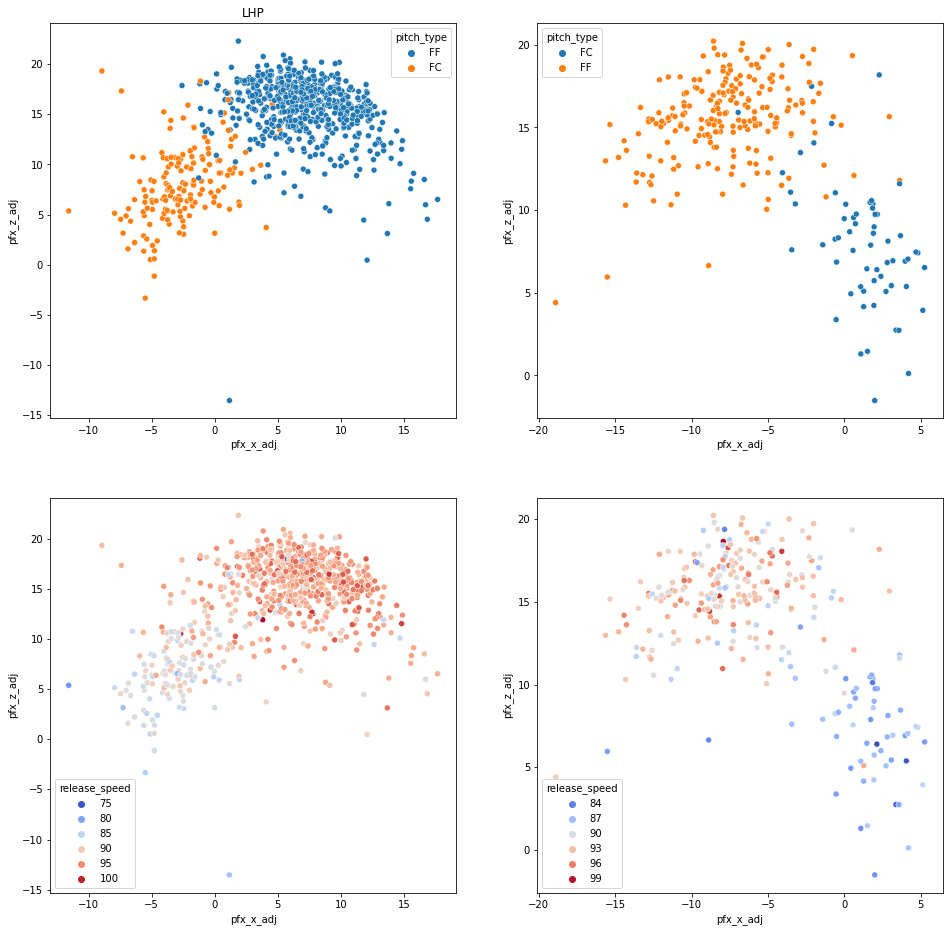

In [177]:
fig, [(ax1, ax2), (ax3, ax4)] = plt.subplots(2, 2, figsize=(16, 16))

sns.scatterplot(x='pfx_x_adj', y='pfx_z_adj', hue='pitch_type', ax=ax1, data=df_r)
sns.scatterplot(x='pfx_x_adj', y='pfx_z_adj', hue='pitch_type', ax=ax2, data=df_l)

sns.scatterplot(x='pfx_x_adj', y='pfx_z_adj', hue='release_speed', palette='coolwarm', ax=ax3, data=df_r)
sns.scatterplot(x='pfx_x_adj', y='pfx_z_adj', hue='release_speed', palette='coolwarm', ax=ax4, data=df_l)

ax1.set_title('RHP')
ax1.set_title('LHP')



In [178]:
import plotly.express as px
px.scatter(df_r.loc[(df_r['n'] > 25)], x='pfx_x_adj', y='pfx_z_adj', color='active_spin', hover_data=['player_name', 'n', 'pitch_type', 'release_speed'])

In [179]:
df.head()

,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,SP,hit_team,active_spin,diff_measured_inferred,pfx_x_adj,pfx_z_adj
0,2850,FF,2021-10-03,92.3,1.40,6.80,"Smith, Will",596019.0,519293,field_out,hit_into_play,NaN,NaN,NaN,NaN,1.0,"Francisco Lindor grounds out, third baseman Eh...",R,R,L,ATL,NYM,X,5.0,ground_ball,1.0,2.0,2021.0,0.69,1.38,-0.69,2.83,NaN,NaN,NaN,2.0,9.0,Top,77.54,155.31,NaN,NaN,518595.0,NaN,NaN,-6.833043,-134.166485,-7.361843,9.708393,26.562803,-14.083224,3.32,1.51,13.0,95.2,-13.0,92.8,2330.0,6.5,632254.0,519293.0,518595.0,663586.0,645277.0,501303.0,606115.0,592696.0,628338.0,594807.0,54.03,0.177,0.171,0.0,1.0,0.0,0.0,2.0,61.0,4.0,4-Seam Fastball,5.0,0.0,0.0,5.0,0.0,5.0,0.0,5.0,Infield shift,Strategic,148.0,0.000,-0.072,0,ATL,0.936316,6.308397,-8.28,16.56
4,3550,FF,2021-10-03,91.2,1.49,6.66,"Smith, Will",607043.0,519293,field_out,hit_into_play,NaN,NaN,NaN,NaN,4.0,"Brandon Nimmo grounds out, second baseman Ozzi...",R,L,L,ATL,NYM,X,4.0,ground_ball,1.0,0.0,2021.0,0.63,1.28,-0.31,2.80,NaN,NaN,NaN,1.0,9.0,Top,144.83,145.72,NaN,NaN,518595.0,NaN,NaN,-5.868477,-132.500539,-6.486796,8.700586,30.117690,-15.941174,3.49,1.60,9.0,93.3,-18.0,90.9,2281.0,6.3,632254.0,519293.0,518595.0,663586.0,645277.0,501303.0,606115.0,592696.0,628338.0,594807.0,54.15,0.093,0.084,0.0,1.0,0.0,0.0,2.0,60.0,2.0,4-Seam Fastball,5.0,0.0,0.0,5.0,0.0,5.0,0.0,5.0,Standard,Standard,143.0,0.002,-0.189,0,ATL,0.936316,6.308397,-7.56,15.36
5,3635,FF,2021-10-03,92.5,1.35,6.74,"Smith, Will",607043.0,519293,NaN,ball,NaN,NaN,NaN,NaN,11.0,"Brandon Nimmo grounds out, second baseman Ozzi...",R,L,L,ATL,NYM,B,NaN,NaN,0.0,0.0,2021.0,0.54,1.45,-1.04,3.58,NaN,NaN,NaN,1.0,9.0,Top,NaN,NaN,NaN,NaN,518595.0,NaN,NaN,-7.263366,-134.382079,-5.347930,8.211265,31.770872,-13.621914,3.65,1.60,NaN,NaN,NaN,92.0,2319.0,6.3,632254.0,519293.0,518595.0,663586.0,645277.0,501303.0,606115.0,592696.0,628338.0,594807.0,54.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,1.0,4-Seam Fastball,5.0,0.0,0.0,5.0,0.0,5.0,0.0,5.0,Standard,Standard,145.0,0.000,0.026,0,ATL,0.936316,6.308397,-6.48,17.40
8,4223,FF,2021-10-03,91.8,1.39,6.75,"Smith, Will",641645.0,519293,NaN,called_strike,NaN,NaN,NaN,NaN,1.0,Luis Guillorme strikes out swinging.,R,L,L,ATL,NYM,S,NaN,NaN,0.0,0.0,2021.0,0.74,1.47,-0.72,2.77,NaN,NaN,NaN,0.0,9.0,Top,NaN,NaN,NaN,NaN,518595.0,NaN,NaN,-6.954151,-133.304779,-7.381744,10.379363,29.462506,-13.261773,3.31,1.55,NaN,NaN,NaN,91.8,2299.0,6.5,632254.0,519293.0,518595.0,663586.0,645277.0,501303.0,606115.0,592696.0,628338.0,594807.0,54.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,1.0,4-Seam Fastball,5.0,0.0,0.0,5.0,0.0,5.0,0.0,5.0,Standard,Standard,146.0,0.000,-0.038,0,ATL,0.936316,6.308397,-8.88,17.64
19,3804,FF,2021-10-03,93.4,-1.71,5.85,"Gsellman, Robert",645277.0,607229,NaN,ball,NaN,NaN,NaN,NaN,11.0,Ozzie Albies lines out to right fielder Michae...,R,L,R,ATL,NYM,B,NaN,NaN,0.0,2.0,2021.0,-0.68,0.89,-1.61,4.07,NaN,NaN,NaN,0.0,8.0,Bot,NaN,NaN,NaN,NaN,664850.0,NaN,NaN,1.727812,-136.067866,-0.864412,-8.810967,27.445166,-21.026702,3.33,1.55,NaN

In [180]:
swings = ['foul', 'hit_into_play', 'swinging_strike', 'foul_tip', 'swinging_strike_blocked']
features = ['release_speed', 'release_pos_x', 'release_pos_z', 'pfx_x_adj', 'pfx_z_adj', 'release_spin_rate', 'release_extension', 'spin_axis', 'active_spin', 'diff_measured_inferred']
rhp = df.loc[(df['p_throws'] == 'R') & (df['description'].isin(swings))].dropna(subset=['release_speed', 'release_pos_x', 'release_pos_z', 'pfx_x_adj', 'pfx_z_adj', 'release_spin_rate', 'release_extension', 'spin_axis', 'active_spin', 'diff_measured_inferred', 'delta_run_exp'])
X = rhp[features]
y = rhp['delta_run_exp']
X.head()


,release_speed,release_pos_x,release_pos_z,pfx_x_adj,pfx_z_adj,release_spin_rate,release_extension,spin_axis,active_spin,diff_measured_inferred
24,95.3,-2.58,6.42,3.24,13.56,2252.0,6.7,205.0,0.913526,-1.471545
27,94.9,-2.71,6.38,9.00,14.16,2224.0,6.6,216.0,0.913526,-1.471545
28,91.1,-2.85,6.39,-3.00,5.28,2156.0,6.7,177.0,0.455222,-43.372224
30,93.5,-0.45,5.87,12.12,17.28,2419.0,6.7,219.0,0.929459,-4.647196
33,94.4,-0.51,5.96,9.96,18.12,2363.0,6.6,217.0,0.929459,-4.647196


In [181]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)

In [182]:
# model = RandomForestRegressor(n_estimators=50, oob_score=True, verbose=2)

# model.fit(X_train, y_train)

In [183]:
from sklearn.metrics import mean_squared_error


In [184]:
# y_pred = model.predict(X_val)

In [185]:
from sklearn.metrics import mean_squared_error
# np.sqrt(mean_squared_error(y_val, y_pred))

In [186]:
# y_pred

In [187]:
X_val['delta_run_exp'] = y_val
X_val['pred_delta_run_exp'] = y_pred
X_val['residual'] = X_val['delta_run_exp'].sub(X_val['pred_delta_run_exp'])

In [188]:
X_val['player_name'] = rhp['player_name']
X_val['pitch_type'] = rhp['pitch_type']

In [189]:
X_val.groupby(['player_name', 'pitch_type'])['release_speed', 'release_pos_x', 'release_pos_z', 'pfx_x_adj', 'pfx_z_adj', 'release_spin_rate', 'release_extension', 'spin_axis', 'active_spin', 'diff_measured_inferred', 'delta_run_exp', 'pred_delta_run_exp', 'residual'].mean().sort_values('delta_run_exp', ascending=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,,release_speed,release_pos_x,release_pos_z,pfx_x_adj,pfx_z_adj,release_spin_rate,release_extension,spin_axis,active_spin,diff_measured_inferred,delta_run_exp,pred_delta_run_exp,residual
player_name,pitch_type,,,,,,,,,,,,,
"Yamamoto, Jordan",FF,92.250000,-1.465000,5.785000,6.9600,16.9800,2288.000000,6.550000,210.500000,0.904119,-8.673644,-0.289000,0.000390,-0.289390
"Bieber, Shane",FC,88.000000,-1.165000,5.505000,0.0600,8.7600,2794.000000,6.200000,245.500000,0.393478,-30.141699,-0.282000,-0.050440,-0.231560
"Jefferies, Daulton",FC,91.233333,-2.645000,5.986667,3.8800,10.3800,2197.833333,5.916667,207.666667,0.728431,-0.808884,-0.269667,-0.090043,-0.179623
"Kennedy, Ian",FC,85.100000,-1.833333,5.370000,-5.6000,3.1600,2266.333333,6.500000,101.333333,0.369956,14.469545,-0.240667,0.292767,-0.533433
"Yamamoto, Jordan",FC,85.950000,-1.780000,5.630000,-0.1200,7.9800,2625.000000,6.450000,183.500000,0.338146,-19.126694,-0.200000,0.129610,-0.329610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Newberry, Jake",FF,93.720000,-1.220000,6.408000,4.0080,17.7360,2411.600000,5.740000,201.000000,0.769537,-8.449361,0.408400,0.017676,0.390724
"Hanhold, Eric",FF,95.018750,-2.190625,6.557500,7.1925,16.1625,2270.062500,6.312500,213.812500,0.878947,-3.516738,0.454563,-0.021704,0.476266
"Roark, Tanner",FF,91.666667,-0.796667,6.060000,4.5600,17.7600,1914.333333,5.966667,202.666667,0.952354,-8.395384,0.508333,-0.016020,0.524353


In [190]:
rhp_pred = model.predict(rhp[features])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.2s finished


In [191]:
rhp['pred_delta_run_exp'] = rhp_pred
rhp['pitch_team'] = np.where((rhp['hit_team']==rhp['home_team']), rhp['away_team'], rhp['home_team'])
rhp


,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,SP,hit_team,active_spin,diff_measured_inferred,pfx_x_adj,pfx_z_adj,pred_delta_run_exp,pitch_team
24,2174,FF,2021-10-03,95.3,-2.58,6.42,"Martin, Chris",664850.0,455119,NaN,foul,NaN,NaN,NaN,NaN,4.0,Patrick Mazeika strikes out swinging.,R,L,R,ATL,NYM,S,NaN,NaN,1.0,1.0,2021.0,-0.27,1.13,-0.37,2.75,NaN,NaN,NaN,2.0,8.0,Top,NaN,NaN,NaN,NaN,518595.0,NaN,NaN,6.446795,-138.624481,-6.649856,-4.802545,27.127618,-16.329957,3.49,1.60,200.0,72.1,24.0,96.4,2252.0,6.7,632254.0,455119.0,518595.0,663586.0,645277.0,501303.0,606115.0,592696.0,594807.0,624585.0,53.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,3.0,4-Seam Fastball,5.0,0.0,0.0,5.0,0.0,5.0,0.0,5.0,Infield shift,Standard,205.0,0.000,-0.027,0,ATL,0.913526,-1.471545,3.24,13.56,-0.03090,NYM
27,2524,FF,2021-10-03,94.9,-2.71,6.38,"Martin, Chris",606299.0,455119,field_out,hit_into_play,NaN,NaN,NaN,NaN,8.0,Jose Peraza flies out to right fielder Jorge S...,R,R,R,ATL,NYM,X,9.0,fly_ball,0.0,0.0,2021.0,-0.75,1.18,-0.10,1.94,NaN,NaN,NaN,1.0,8.0,Top,181.75,87.93,NaN,NaN,518595.0,NaN,NaN,8.562207,-137.797602,-8.629003,-11.450328,29.298997,-15.415123,3.37,1.53,308.0,91.8,29.0,95.5,2224.0,6.6,632254.0,455119.0,518595.0,663586.0,645277.0,501303.0,606115.0,592696.0,594807.0,624585.0,53.86,0.093,0.119,0.0,1.0,0.0,0.0,3.0,54.0,1.0,4-Seam Fastball,5.0,0.0,0.0,5.0,0.0,5.0,0.0,5.0,Standard,Standard,216.0,0.003,-0.163,0,ATL,0.913526,-1.471545,9.00,14.16,0.10168,NYM
28,2609,FC,2021-10-03,91.1,-2.85,6.39,"Martin, Chris",542340.0,455119,field_out,hit_into_play,NaN,NaN,NaN,NaN,6.0,Jonathan Villar grounds out to first baseman A...,R,L,R,ATL,NYM,X,3.0,ground_ball,1.0,0.0,2021.0,0.25,0.44,0.67,2.62,NaN,NaN,NaN,0.0,8.0,Top,164.58,163.06,NaN,NaN,518595.0,NaN,NaN,8.381405,-132.442538,-4.594885,1.372882,25.190083,-26.250283,3.37,1.53,6.0,76.1,-25.0,92.1,2156.0,6.7,632254.0,455119.0,518595.0,663586.0,645277.0,501303.0,606115.0,592696.0,594807.0,624585.0,53.80,0.050,0.045,0.0,1.0,0.0,0.0,2.0,53.0,2.0,Cutter,5.0,0.0,0.0,5.0,0.0,5.0,0.0,5.0,Standard,Standard,177.0,0.006,-0.279,0,ATL,0.455222,-43.372224,-3.00,5.28,-0.23042,NYM
30,2823,FF,2021-10-03,93.5,-0.45,5.87,"Hembree, Heath",606115.0,592390,field_out,hit_into_play,NaN,NaN,NaN,NaN,12.0,"Orlando Arcia grounds out, second baseman Jose...",R,R,R,ATL,NYM,X,4.0,ground_ball,0.0,2.0,2021.0,-1.01,1.44,0.91,2.50,NaN,NaN,NaN,2.0,7.0,Bot,118.45,137.33,NaN,NaN,664850.0,NaN,NaN,5.786463,-135.961301,-6.129347,-13.778373,31.123079,-13.148659,3.37,1.53,7.0,99.7,-18.0,93.9,2419.0,6.7,632254.0,592390.0,664850.0,624413.0,606299.0,542340.0,596019.0,642086.0,607043.0,624424.0,53.84,0.167,0.150,0.0,1.0,0.0,0.0,2.0,52.0,3.0,4-Seam Fastball,5.0,0.0,5.0,0.0,0.0,5.0,5.0,0.0,Infield shift,Standard,219.0,-0.001,-0.061,0,ATL,0.929459,-4.647196,12.12,17.28,0.01806,NYM
33,3169,FF,2021-10-03,94.4,-0.51,5.96,"Hembree, Heath",624585.0,592390,field_out,hit_into_play,NaN,NaN,NaN,NaN,3.0,Jorge Soler pops out to first baseman Pete Alo...,R,R,R,ATL,NYM,X,3.0,popup,2.0,2.0,2021.0,-0.83,1.51,0.34,3.

In [192]:
rhp_grouped = rhp.groupby(['player_name', 'pitch_type', 'hit_team'])['release_speed', 'release_pos_x', 'release_pos_z', 'pfx_x_adj', 'pfx_z_adj', 'release_spin_rate', 'release_extension', 'spin_axis', 'active_spin', 'diff_measured_inferred', 'delta_run_exp', 'pred_delta_run_exp'].mean().reset_index()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [193]:
px.scatter(rhp_grouped, x='pfx_x_adj', y='pfx_z_adj', color='delta_run_exp', hover_data=['player_name', 'pitch_type', 'active_spin', 'release_speed', 'hit_team'])

In [194]:
v95 = pd.read_csv('velocity_95.csv')
v98 = pd.read_csv('velocity_98.csv')
v100 = pd.read_csv('velocity_100.csv')

In [195]:
v100.head()

,error
0,Error: Query Timeout. Please try to limit your...


In [196]:
ssw = pd.read_csv('active_spin_ssw.csv')
ssw.head()

,year,last_name,first_name,player_id,pitch_hand,api_pitch_type,n_pitches,release_speed,spin_rate,movement_inches,alan_active_spin_pct,active_spin,hawkeye_measured,movement_inferred,api_pitch_name,active_spin_formatted,hawkeye_measured_clock_minutes,movement_inferred_clock_minutes,diff_measured_inferred,diff2,diff_measured_inferred_minutes,hawkeye_measured_clock_hh,hawkeye_measured_clock_mm,movement_inferred_clock_hh,movement_inferred_clock_mm,diff_clock_hh,diff_clock_mm,hawkeye_measured_clock_label,movement_inferred_clock_label,diff_clock_label
0,NaN,Tice,Ty,676709,R,FF,61,94.2,2206,15.8,0.759032,0.852203,153.665756,152.006521,4-Seam Fastball,85,60,60,1.659234,1.659234,0,1,0,1,0,0,0,1:00,1:00,0H 00M
1,NaN,Fry,Paul,643316,L,FF,469,92.8,2331,13.5,0.623063,0.668760,224.814435,205.939074,4-Seam Fastball,67,630,675,18.875362,18.875362,-45,10,30,11,15,0,45,10:30,11:15,-0H 45M
2,NaN,Gil,Luis,661563,R,FF,284,96.1,2445,18.0,0.827785,0.848475,159.999223,164.837522,4-Seam Fastball,85,765,750,-4.838299,4.838299,15,12,45,12,30,0,15,12:45,12:30,+0H 15M
3,NaN,Gray,Jon,592351,R,FF,1196,94.9,2152,17.0,0.901030,0.955412,139.449584,127.269570,4-Seam Fastball,96,75,105,12.180014,12.180014,-30,1,15,1,45,0,30,1:15,1:45,-0H 30M
4,NaN,Hill,Tim,657612,L,FF,428,92.0,2257,20.1,0.941052,0.978938,263.689767,261.265986,4-Seam Fastball,98,555,555,2.423781,2.423781,0,9,15,9,15,0,0,9:15,9:15,0H 00M


In [197]:
ssw.corr()

,year,player_id,n_pitches,release_speed,spin_rate,movement_inches,alan_active_spin_pct,active_spin,hawkeye_measured,movement_inferred,active_spin_formatted,hawkeye_measured_clock_minutes,movement_inferred_clock_minutes,diff_measured_inferred,diff2,diff_measured_inferred_minutes,hawkeye_measured_clock_hh,hawkeye_measured_clock_mm,movement_inferred_clock_hh,movement_inferred_clock_mm,diff_clock_hh,diff_clock_mm
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
player_id,NaN,1.000000,-0.071881,0.246892,-0.038593,0.007349,0.038286,0.048208,-0.062435,-0.072332,0.047266,-0.020305,-0.028968,0.001080,-0.028556,-0.012742,-0.019298,-0.027726,-0.029434,-0.007785,0.043352,-0.007197
n_pitches,NaN,-0.071881,1.000000,0.102260,0.098800,0.135867,0.121097,0.093815,0.052619,0.041420,0.093175,0.106149,0.011566,0.073365,-0.069519,-0.068707,0.105511,0.061394,0.013937,-0.034769,0.024918,-0.098601
release_speed,NaN,0.246892,0.102260,1.000000,0.314482,0.092719,0.123019,0.097192,-0.193259,-0.178081,0.096868,-0.182791,-0.138449,-0.170792,-0.194295,0.164595,-0.186456,-0.019663,-0.146842,0.069703,-0.158572,-0.109669
spin_rate,NaN,-0.038593,0.098800,0.314482,1.000000,0.057192,-0.147713,-0.362557,-0.065018,-0.043439,-0.362659,0.004871,0.074694,-0.120073,0.066615,0.116526,0.004365,0.011438,0.073198,0.066823,-0.037934,0.069445
movement_inches,NaN,0.007349,0.135867,0.092719,0.057192,1.000000,0.960004,0.833479,0.051886,0.011897,0.832836,0.019324,-0.109220,0.182367,-0.605841,-0.177820,0.017980,0.033353,-0.110148,-0.043697,-0.081820,-0.487789
alan_active_spin_pct,NaN,0.038286,0.121097,0.123019,-0.147713,0.960004,1.000000,0.928646,0.053960,0.008411,0.928268,-0.003196,-0.143189,0.204718,-0.644871,-0.198075,-0.005025,0.031530,-0.144183,-0.061147,-0.089488,-0.514721
active_spin,NaN,0.048208,0.093815,0.097192,-0.362557,0.833479,0.928646,1.000000,0.080744,0.032292,0.999447,-0.014215,-0.171466,0.231426,-0.685391,-0.222672,-0.015543,0.017316,-0.171736,-0.089191,-0.117988,-0.536655
hawkeye_measured,NaN,-0.062435,0.052619,-0.193259,-0.065018,0.051886,0.053960,0.080744,1.000000,0.980282,0.078363,0.636917,0.510462,0.660172,0.004320,-0.613745,0.652523,0.017281,0.524903,0.029091,-0.124530,0.056564
movement_inferred,NaN,-0.072332,0.041420,-0.178081,-0.043439,0.011897,0.008411,0.032292,0.980282,1.000000,0.029621,0.631541,0.547050,0.498732,0.044977,-0.464041,0.646590,0.024808,0.562772,0.026917,-0.154077,0.099573


In [198]:
df

,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,SP,hit_team,active_spin,diff_measured_inferred,pfx_x_adj,pfx_z_adj
0,2850,FF,2021-10-03,92.3,1.40,6.80,"Smith, Will",596019.0,519293,field_out,hit_into_play,NaN,NaN,NaN,NaN,1.0,"Francisco Lindor grounds out, third baseman Eh...",R,R,L,ATL,NYM,X,5.0,ground_ball,1.0,2.0,2021.0,0.69,1.38,-0.69,2.83,NaN,NaN,NaN,2.0,9.0,Top,77.54,155.31,NaN,NaN,518595.0,NaN,NaN,-6.833043,-134.166485,-7.361843,9.708393,26.562803,-14.083224,3.32,1.51,13.0,95.2,-13.0,92.8,2330.0,6.5,632254.0,519293.0,518595.0,663586.0,645277.0,501303.0,606115.0,592696.0,628338.0,594807.0,54.03,0.177,0.171,0.0,1.0,0.0,0.0,2.0,61.0,4.0,4-Seam Fastball,5.0,0.0,0.0,5.0,0.0,5.0,0.0,5.0,Infield shift,Strategic,148.0,0.000,-0.072,0,ATL,0.936316,6.308397,-8.28,16.56
4,3550,FF,2021-10-03,91.2,1.49,6.66,"Smith, Will",607043.0,519293,field_out,hit_into_play,NaN,NaN,NaN,NaN,4.0,"Brandon Nimmo grounds out, second baseman Ozzi...",R,L,L,ATL,NYM,X,4.0,ground_ball,1.0,0.0,2021.0,0.63,1.28,-0.31,2.80,NaN,NaN,NaN,1.0,9.0,Top,144.83,145.72,NaN,NaN,518595.0,NaN,NaN,-5.868477,-132.500539,-6.486796,8.700586,30.117690,-15.941174,3.49,1.60,9.0,93.3,-18.0,90.9,2281.0,6.3,632254.0,519293.0,518595.0,663586.0,645277.0,501303.0,606115.0,592696.0,628338.0,594807.0,54.15,0.093,0.084,0.0,1.0,0.0,0.0,2.0,60.0,2.0,4-Seam Fastball,5.0,0.0,0.0,5.0,0.0,5.0,0.0,5.0,Standard,Standard,143.0,0.002,-0.189,0,ATL,0.936316,6.308397,-7.56,15.36
5,3635,FF,2021-10-03,92.5,1.35,6.74,"Smith, Will",607043.0,519293,NaN,ball,NaN,NaN,NaN,NaN,11.0,"Brandon Nimmo grounds out, second baseman Ozzi...",R,L,L,ATL,NYM,B,NaN,NaN,0.0,0.0,2021.0,0.54,1.45,-1.04,3.58,NaN,NaN,NaN,1.0,9.0,Top,NaN,NaN,NaN,NaN,518595.0,NaN,NaN,-7.263366,-134.382079,-5.347930,8.211265,31.770872,-13.621914,3.65,1.60,NaN,NaN,NaN,92.0,2319.0,6.3,632254.0,519293.0,518595.0,663586.0,645277.0,501303.0,606115.0,592696.0,628338.0,594807.0,54.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,1.0,4-Seam Fastball,5.0,0.0,0.0,5.0,0.0,5.0,0.0,5.0,Standard,Standard,145.0,0.000,0.026,0,ATL,0.936316,6.308397,-6.48,17.40
8,4223,FF,2021-10-03,91.8,1.39,6.75,"Smith, Will",641645.0,519293,NaN,called_strike,NaN,NaN,NaN,NaN,1.0,Luis Guillorme strikes out swinging.,R,L,L,ATL,NYM,S,NaN,NaN,0.0,0.0,2021.0,0.74,1.47,-0.72,2.77,NaN,NaN,NaN,0.0,9.0,Top,NaN,NaN,NaN,NaN,518595.0,NaN,NaN,-6.954151,-133.304779,-7.381744,10.379363,29.462506,-13.261773,3.31,1.55,NaN,NaN,NaN,91.8,2299.0,6.5,632254.0,519293.0,518595.0,663586.0,645277.0,501303.0,606115.0,592696.0,628338.0,594807.0,54.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,1.0,4-Seam Fastball,5.0,0.0,0.0,5.0,0.0,5.0,0.0,5.0,Standard,Standard,146.0,0.000,-0.038,0,ATL,0.936316,6.308397,-8.88,17.64
19,3804,FF,2021-10-03,93.4,-1.71,5.85,"Gsellman, Robert",645277.0,607229,NaN,ball,NaN,NaN,NaN,NaN,11.0,Ozzie Albies lines out to right fielder Michae...,R,L,R,ATL,NYM,B,NaN,NaN,0.0,2.0,2021.0,-0.68,0.89,-1.61,4.07,NaN,NaN,NaN,0.0,8.0,Bot,NaN,NaN,NaN,NaN,664850.0,NaN,NaN,1.727812,-136.067866,-0.864412,-8.810967,27.445166,-21.026702,3.33,1.55,NaN

In [199]:
df['hc_x_round'] = df.hc_x.round()
df['velo_round'] = df['release_speed'].round()
df['velo_round']

0         92.0
4         91.0
5         92.0
8         92.0
19        93.0
          ... 
709846    96.0
709847    95.0
709848    96.0
709849    96.0
709850    95.0
Name: velo_round, Length: 296862, dtype: float64

In [200]:
df['hc_x_round']

0          78.0
4         145.0
5           NaN
8           NaN
19          NaN
          ...  
709846      NaN
709847      NaN
709848      NaN
709849      NaN
709850      NaN
Name: hc_x_round, Length: 296862, dtype: float64

<AxesSubplot:xlabel='hc_x_round', ylabel='velo_round'>

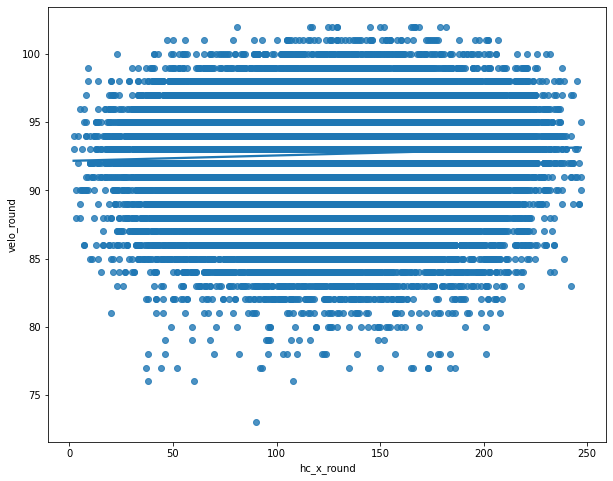

In [201]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.regplot(x='hc_x_round', y='velo_round', ax=ax, data=df)

In [202]:
df['hc_y'].

SyntaxError: invalid syntax (Temp/ipykernel_18804/2547120671.py, line 1)

In [ ]:
df['hc_x'].describe()

help(pybaseball.plot_stadium)

Help on function plot_stadium in module pybaseball.plotting:

plot_stadium(team)
    Plot the outline of the specified team's stadium using MLBAM coordinates
    
    Parameters
    ----------
    team: name of team whose stadium you want plotted



In [ ]:
df.corr()[['hc_x', 'hc_y']].sort_values(by=['hc_x'], ascending=False).head(20)

,hc_x,hc_y
hc_x,1.000000,-0.007820
hc_x_round,0.999977,-0.007802
plate_x,0.275477,-0.000940
hit_location,0.165720,-0.749838
vx0,0.115305,-0.015651
zone,0.055383,0.116962
spin_axis,0.051040,-0.017018
release_speed,0.050277,-0.028523
velo_round,0.049744,-0.028227
launch_angle,0.037110,-0.296117


In [ ]:
df['hit_location']

0         5.0
4         4.0
5         NaN
8         NaN
19        NaN
         ... 
709846    NaN
709847    NaN
709848    NaN
709849    NaN
709850    NaN
Name: hit_location, Length: 296862, dtype: float64

In [ ]:
pybaseball.plot_stadium('SF')

IndexError: list index out of range

In [ ]:
help(pybaseball.plotting)

Help on module pybaseball.plotting in pybaseball:

NAME
    pybaseball.plotting

FUNCTIONS
    plot_bb_profile(df: pandas.core.frame.DataFrame, parameter: Union[str, NoneType] = 'launch_angle')
        Plots a given StatCast parameter split by bb_type
        
        Args:
            df (pd.DataFrame): StatCast pd.DataFrame (retrieved through statcast, statcast_batter, etc)
            parameter (Optional[str], optional): Parameter to plot. Defaults to "launch_angle".
    
    plot_stadium(team)
        Plot the outline of the specified team's stadium using MLBAM coordinates
        
        Parameters
        ----------
        team: name of team whose stadium you want plotted
    
    spraychart(data, team_stadium, title='', tooltips=[], size=100, colorby='events', legend_title='', width=500, height=500)
        Produces a spraychart using statcast data overlayed on specified stadium
        
        Parameters
        ----------
        data: statcast batter data
        team_stad

In [ ]:
df['hc_x_adj'] = np.where((df['stand']=='L'), df['hc_x_round'].mul(-1), df['hc_x_round'])
df['hc_y_adj'] = df.hc_y.mul(-1)


<AxesSubplot:xlabel='hc_x_adj', ylabel='velo_round'>

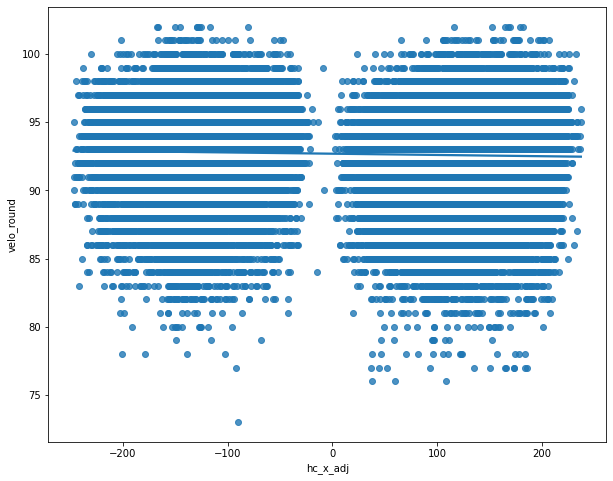

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.regplot(x='hc_x_adj', y='velo_round', ax=ax, data=df)

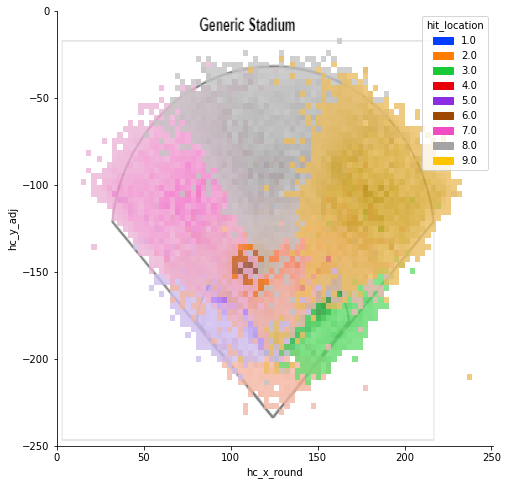

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))


img = plt.imread('stadium.png')
ax.imshow(img, extent=[0, 220, -250, 0])

sns.histplot(df, x='hc_x_round', y='hc_y_adj', hue='hit_location', palette='bright', alpha=0.8, ax=ax)
sns.despine()


In [ ]:
print(df['hc_x'].mean())

127.62062592841389


In [ ]:
df.hc_x.describe()

count    49143.000000
mean       127.620626
std         42.105825
min          2.370000
25%         99.415000
50%        127.270000
75%        156.775000
max        246.710000
Name: hc_x, dtype: float64

In [ ]:
df.hc_y.describe()

count    49143.000000
mean       117.063094
std         41.520780
min          2.600000
25%         85.240000
50%        117.260000
75%        149.880000
max        232.160000
Name: hc_y, dtype: float64

In [ ]:
pybaseball.plot_stadium('generic')

alt.Chart(...)

In [ ]:
fast = df.loc[df['release_speed'] >= 95]
fast.groupby(['pitch_type'])['hc_x', 'hc_y'].agg([np.mean])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,hc_x,hc_y
,mean,mean
pitch_type,,
FC,134.826623,132.531854
FF,129.684081,116.579589


ValueError: Could not interpret value `hc_y_adj` for parameter `y`

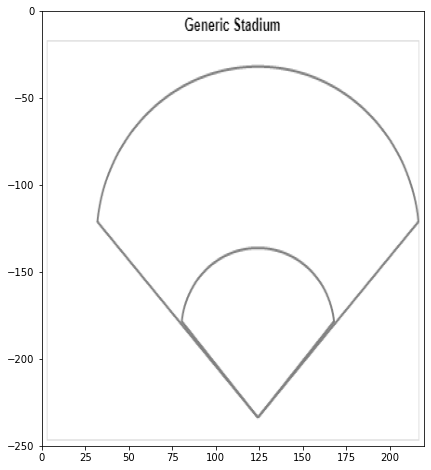

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))


img = plt.imread('stadium.png')
ax.imshow(img, extent=[0, 220, -250, 0])

sns.histplot(fast, x='hc_x_round', y='hc_y_adj', hue='hit_location', palette='bright', alpha=0.8, ax=ax)
sns.despine()
